In [43]:
import matplotlib.pyplot as plt
import torch
from glob import glob

from PIL import Image
import numpy as np

In [56]:
def a():
    return 20, None

In [57]:
loss, other = a()

In [58]:
loss

20

In [61]:
if other is None:
    print("Asdf")

Asdf


In [67]:
monitor_values = {}

In [68]:
for name, value in monitor_values.items():
    print(name, value)

In [69]:
torch.tensor([1,2,3]) + torch.tensor([1,2,3])

tensor([2, 4, 6])

In [72]:
10 // 3

3

In [73]:
from datasets.styletransfer import StyleTransferDataset
from torch.utils.data import DataLoader
from torchvision import transforms

transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

valid_dataset = StyleTransferDataset(root="data/monet2photo/", limit=10, train=False, transform=transforms)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=True)

In [77]:
from models.cycle_gan_resnet import CycleGANResNet
model = CycleGANResNet((3,256,256), (3,256,256), name='model', device='cpu', is_train=False, lr =0.2)

In [123]:
checkpoints = torch.load("logs/CYCLE-GAN/expr_20251114_181625/CYCLE-GAN_checkpoint_epoch_2.pth", weights_only=False)

In [130]:
for key, value in checkpoints.items():
    print(key)

epoch
step
loss
model


In [124]:
from models.cycle_gan_unet import CycleGAN

In [131]:
model = CycleGAN((3,256,256), (3,256,256), name='model', device='cpu', is_train=False, lr=0.2)
model.load_checkpoint(checkpoints["model"])

In [80]:
o = model.G_ab(valid_dataset[0][0].unsqueeze(0))

In [109]:
o.shape

torch.Size([1, 3, 256, 256])

In [110]:
image = o.squeeze(0)

In [112]:
image = ((image + 0.5) * 0.5 * 255)

In [118]:
image = image.type(torch.uint8).detach().numpy().transpose(1,2,0)

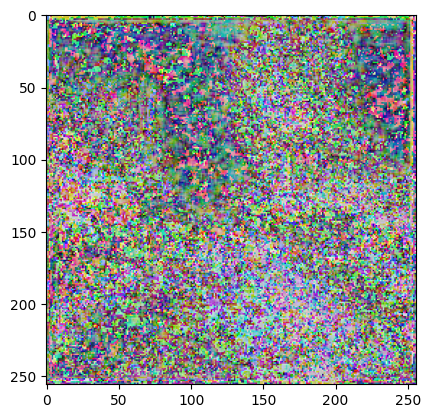

In [119]:
plt.imshow(image)